# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

# Linear Regression
Used to predict quantitative (numerical) response. 
* Can we determine if a relationship exists between predictors and response?
* Hows strong is this relationship?
* Which predictors are related to response?
* How accurate are predictions once model is fit?
* Is a linear model appropriate?
* Are there interaction effects?

# Simple Linear Regression
Technically this means one predictor is linearly related to the response. $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters. Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
adv = pd.read_csv('data/Advertising.csv')
adv.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

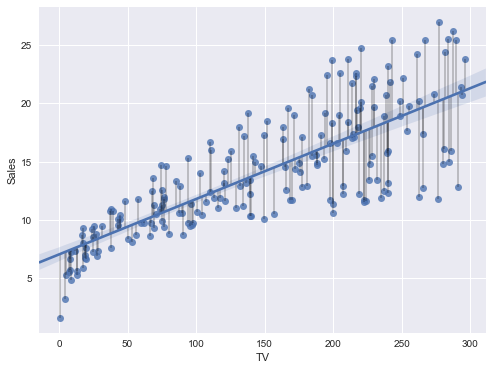

In [5]:
fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [6]:
fit

array([ 0.04753664,  7.03259355])

# Quantifying Best Line
Many lines can be arbitrarily drawn through the advertising data above. Typically the line that minimizes the sum of squared error (also called residual sum of squares (RSS)) between the points and the estimated line is used. But you are free to choose the line of your choice when modeling. Least absolute error, connecting a line through the first and last points, a hand drawn line are different ways you could model the relationship.

The line above was fitted using numpy's polyfit function, with a final model of $\hat{Y} = 7 + .048X$. For every one unit increase in X a .048 increase in Sales would happen. Since the data is in thousands, every $1,000 dollars in advertising spent corresponds to an increase of 48 sales.

# Different Parameter Values
Different values of the parameter's each produce different values of the mean squared error (the metric used to determine best fit). The work below outlines a number of combinations of both $\hat{\beta_0}$ and $\hat{\beta_1}$ through contour lines that show the error at each combination and a corresponding 3D plot. The central point in each figure is the point where MSE is minimized.

In [7]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(.03, .07, 50)

In [8]:
errors = np.array([np.mean((adv['Sales'].values - (b_0 + b_1 * adv['TV'].values)) ** 2) for b_1 in b1 for b_0 in b0])   

In [9]:
B0, B1 = np.meshgrid(b0, b1)

In [10]:
errors_mesh = errors.reshape(B0.shape)

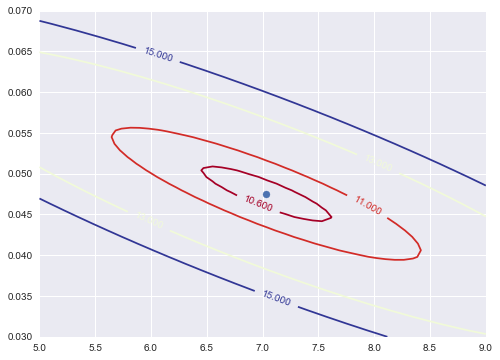

In [11]:
cmap = plt.cm.RdYlBu
plt.figure(figsize=(8,6))
cs = plt.contour(B0, B1, errors_mesh, cmap=cmap, levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(fit[1], fit[0]);

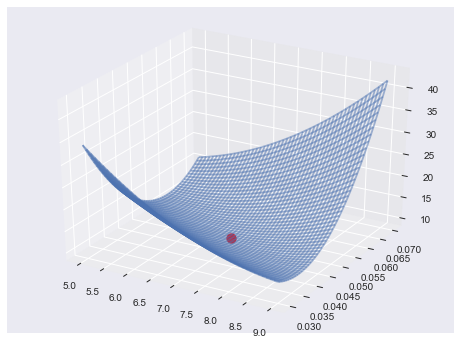

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(fit[1], fit[0], errors_mesh.min(), s=100, c='r')
ax.plot_wireframe(B0, B1, errors_mesh, alpha=.5);

# True Regression Line
The theoretical best linear relationship can be defined as: $$Y = \beta_0 + \beta_1 X + \epsilon$$

This 'population regression line' will never be known in practice and remain unobserved unless it came from simulated data.

**Unbiased** - An estimator that doesn't systematically over or underestimate the value of the parameter it is estimating

### How accurate our our estimators?
It's great that our linear regression model using least-squares produced a line that looks right, but how much will this line expect to vary from sample to sample?

In the case of estimating a sample mean $\hat{\mu}$ from a number of points $n$, we get that the $Var(\hat{\mu}) = \frac{\sigma^2}{n}$ where $\sigma$ is the standard distribution of the original set of $n$ points. The square root of this value is called the **standard error** and gives us a rough idea of how much the estimator will change from sample to sample. Formulas for standard errors of $\beta_0$ and $\beta_1$ are given in the text.

### Confidence intervals of estimators
Knowing how to derive our standard error and assuming the errors are Gaussian we can generate a confidence interval based on a t-distribution. For instance, approximately 95% of all samples will be contained in the following interval: $\beta_1 \pm 2 * SE(\beta_1)$.

### Using standard errors for hypothesis testing
If the standard error is large and the estimated value small then the estimator might not be significantly different than 0, meaning it statistically is insignificant. To test significance a hypothesis test can be done on any of the predictors. The hypothesis test is usually done to test whether the predictor is different than 0. The null hypothesis $$H_0: \beta_1 = 0 $$

is tested against the alternative
$$H_a: \beta_1 \ne 0 $$

To test this we find out how many standard errors our parameter is away from 0. $\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$

This result is a t-statistic. The t-distribution is then used to determine the percentage of time that a random value would fall beyond this t-statistic. This percentage is called the **p-value** and used as a measure of how extreme the results of your data are. The smaller the p-value the more extreme the results and the more likely they did not come from randomness.

## What p-value is good enough
The most standard p-value that you will encounter in the real world is .05, which means that if you can demonstrate that there is at least at 95% chance that your estimator did not arise from randomness you will reject the null hypothesis and note that there is a statistically significant difference between your estimator and 0.

## Cautionary tales of p-values
95% sounds pretty solid until you realize that there are millions of studies that have been done and just by randomness 5% will have falsely concluded statistically significance when there was none. Below is some work that shows (using a binomial distribution that when tossing a fair coin 100 times, there is just about a 95% chance that you will get between 41 and 59 heads/tails. That means tossing 40 or less or 60 or more coins would generate a p-value of .05 or less. Would you be satisfied with someone telling you a coin was biased after getting 60 heads? This effect is compounded in real life experiments where there are lots of unknowns and lots of assumptions that are getting violated. Maybe enforcing a p-value of .01 would be a better choice.

In [13]:
# Calculate exact probability using a binomial distribution for those between 41 and 59
from scipy.misc import comb
probs = [comb(100, i) * .5 ** 100 for i in range(41, 60)]

In [14]:
# What is the probability of generating between 41 and 59 heads?
sum(probs)

0.94311206635901923

In [15]:
# simulate some data. Toss a coin 100 times and get find percentage heads. Do this 1000 times and see how many
# trials have 60 or more heads
# About 2.5% of the time we will have concluded the coin is biased when it is not!
((np.random.rand(1000,100) > .5).mean(1) >= .6).mean()

0.035999999999999997

# Fun with p-values
A favorite of mine on the trouble with p-values

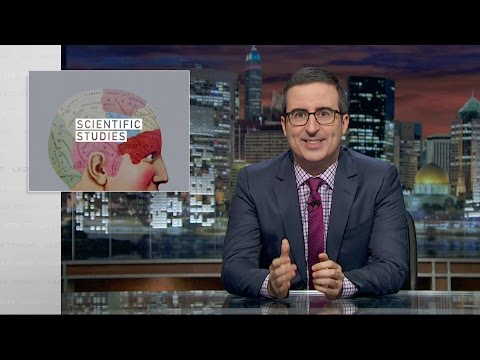

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("0Rnq1NpHdmw", width=800, height=600)

# Accuracy of the Model
Above we discussed the accuracy and significance of the parameters in the model. Now to discuss the accuracy of the model. One simple way is to look at the regression line drawn through the points - the first plot in this notebook. We can see that the data is still quite noisy and there will be a high degree of variance no matter where we are on the line.

# How much better than randomness?
One direct way of measuring the model is to find out how much better the model does than randomness. For this, we must have a model for randomness - and that model is not just randomly choosing a point but is choosing the mean of all the points.

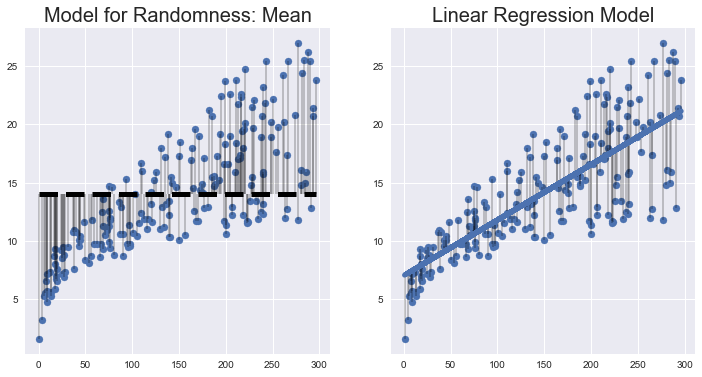

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize={12,6})
ax1.scatter(adv['TV'], adv['Sales'])
ax1.hlines(adv['Sales'].mean(), adv['TV'].min(), adv['TV'].max(), linestyle='--', lw=5)
ax1.vlines(adv['TV'], adv['Sales'].mean(), adv['Sales'], lw=.4)
ax1.set_title("Model for Randomness: Mean", fontsize=20)

ax2.scatter(adv['TV'], adv['Sales'])
ax2.plot(adv['TV'], adv['TV'] * fit[0] + fit[1], lw=5)
ax2.vlines(adv['TV'], adv['TV'] * fit[0] + fit[1], adv['Sales'], lw=.4)
ax2.set_title("Linear Regression Model", fontsize=20);

# Errors using the Mean and Errors using the Model
As you can see above the errors when using the mean are greater than the errors using the model. Lets plot a histogram of the absolute value of the errors of each to more easily view what is taking place. Looking at the histogram its obvious that a the model is producing a better fit.

In [19]:
errors_mean = abs(adv['Sales'] - adv['Sales'].mean())
errors_model = abs(adv['Sales'] - (adv['TV'] * fit[0] + fit[1] ))

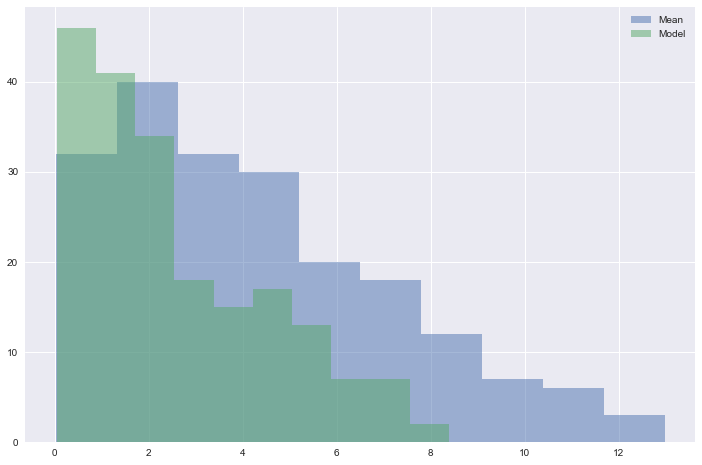

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(errors_mean, alpha = .5, label="Mean")
plt.hist(errors_model, alpha=.5, label="Model")
plt.legend();

In [21]:
# How often is the model better
# Somewhat suprisingly, only 71.5 % of the time, the model is better than the mean
(errors_model < errors_mean).mean()

0.71499999999999997

# How Much Better than the SST
The sum of squares total (SST) is defined as the sum of all the squared deviations from the mean. This serves as a baseline as to how much variance there is in the model. $\sum{(y - \bar{y})^2}$. The sum of squares error (SSE) is how much error there is in the model. The difference between the predicted and observed values. $\sum{(\hat{y} - y)^2}$. The sum of squares regression is defined as the sum of the squared differences between the regression line and the mean. $\sum{(\hat{y} - \bar{y})^2}$. Mathematically we have the equality $$SST = SSR + SSE$$

In [22]:
# Since we already have enough to calculate SST and SSE, lets do that
# Notice how much lower our SSE is. If SSE is 0 that means we have a perfect fit (and likely overfit)
SST = (errors_mean ** 2).sum()
SSE = (errors_model ** 2).sum()
SST, SSE

(5417.148749999998, 2102.530583131351)

# $R^2$ Statistic
$R^2$ is a statistic that can tell us what percentage of the total variation (SST) has been 'explained' by the model. Or what percentage of the variation (SST) was removed by using the model.If we calculate SSE / SST, that would give us the percentage of variation left after using our model. Calculating 1 - SSE / SST would give us the total amount of variation captured by the model. A number close to 1 would indicate a better fit. For the current model we can say: 61% of the variation was explained by X (TV advertising)

In [23]:
# R-squared
1 - SSE / SST

0.611875050850071

In [24]:
# F - Statistic MSR / MSE
MSR = (SST - SSE) / 1
MSE = SSE / (errors_model.size - 2)
F_stat = MSR / MSE
F_stat

312.1449943727128

# Using the statsmodels api
The excellent [statsmodels library](http://statsmodels.sourceforge.net/) integrates neatly with the pandas DataFrame to do statistical analysis. Some simple 

In [25]:
import statsmodels.formula.api as smf

In [26]:
results = smf.ols('Sales ~ TV', data=adv).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.47e-42
Time:                        12:47:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Simple linear regression with newspaper
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 10 Jul 2017   Prob (F-statistic):            0.00115
Time:                        12:47:50   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 10 Jul 2017   Prob (F-statistic):            0.00115
Time:                        12:47:52   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression
Instead of running a simple linear model for each predictor, a model can be built that incorporates all of the predictors. Doing this results in Newspaper becoming insignificant.

In [30]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.58e-96
Time:                        12:47:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Newspaper is least highly correlated with Sales
# Its relatively high correlation to Radio could be the reason it was significant on its own and not
# when Radio was also in the model
adv.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

# Null Hypothesis in Multiple Linear Regression
The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

# Selecting a subest of a model
In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But if the number of predictors were more, it might be troubling to manually fit many models and hand-select which variables to include in the model. Forward, backward and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R-squared

* Forward - starts with an empty model and adds one variable at a time until the statistic is maximized
* Backward - starts with a full model and removes one variable at a time
* Mixed - starts empty and either removes or adds a variable at each step

# Categorical predictor variables
Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called qualitative or factor variables. 


In [148]:
credit = pd.read_csv('data/Credit.csv')

In [153]:
credit['Female'] = (credit.Gender == 'Female').astype(int)

In [154]:
credit.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  Female  
0  Caucasian      333       0  
1      Asian      903       1  
2      Asian      580       0  
3      Asian      964       1  
4  Caucasian      331       0

In [155]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 10 Jul 2017   Prob (F-statistic):              0.669
Time:                        13:01:53   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# same thing
credit[credit['Female'] == 0]['Balance'].mean(), credit[credit['Female'] == 1]['Balance'].mean()

(509.8031088082902, 529.536231884058)

# The broken assumptions of a linear model
There are several assumptions that are used when fitting a linear model. 
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* The predictor variables are independent. An increase in one won't result in an increase in another
* The change in response for a one unit increase in X is the same no matter what the value of X

# Challenging the linearity constraint through interaction effects
In a linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together.

In [37]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          6.68e-146
Time:                        12:48:18   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression is Still Linear
Despite the fact that the regression line can be visibly non-linear the squaring predictor variables still means we are doing linear regression. The requirements for a regression to be 'linear' is to have it linear in the parameters. Heres a good link discussing the difference between linear and non-linear regression. http://blog.minitab.com/blog/adventures-in-statistics/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

In [38]:
# Nonlinearity of data
resid = adv['Sales'] - results.predict(adv)

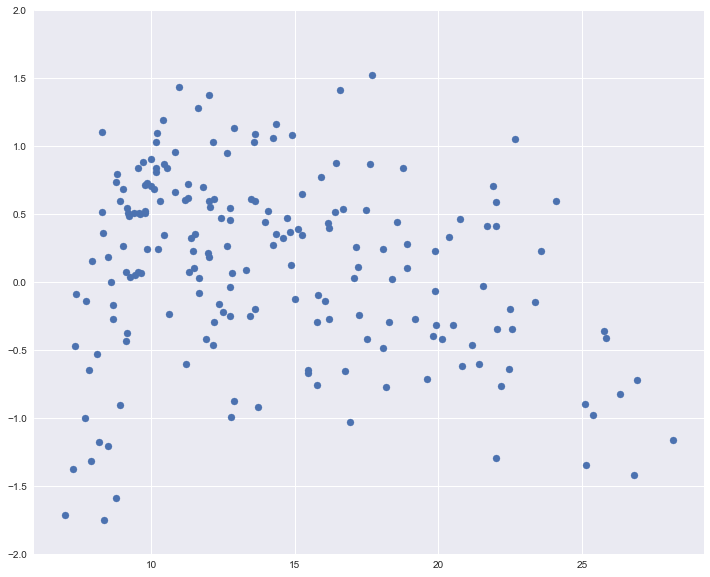

In [39]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2);

# Lab
In the book, the lab focuses on performing a linear regression on the Boston dataset. We will do so using seaborn, statsmodels and scikit learn

In [40]:
boston = pd.read_csv('data/boston.csv')
boston.head(10)

crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

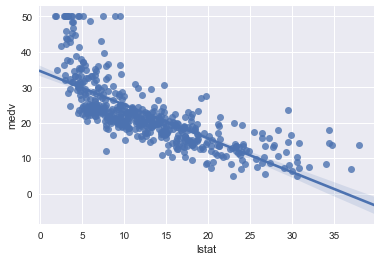

In [41]:
sns.regplot('lstat', 'medv', data=boston);

In [42]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.08e-88
Time:                        12:48:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

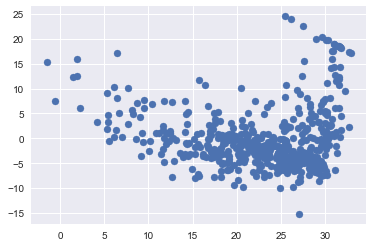

In [43]:
# look at residuals
# Yikes. lots of nonlinearity. Need a different model
plt.scatter(results.fittedvalues, results.resid);

In [44]:
# Get all columns. No easy way to do this like in R
# Mostly highly significant variables
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          6.72e-135
Time:                        12:48:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          6.08e-136
Time:                        12:48:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           4.86e-88
Time:                        12:48:54   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          1.56e-112
Time:                        12:48:56   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
from statsmodels.stats.anova import anova_lm

In [49]:
results1 = smf.ols('medv ~ lstat', data=boston).fit()
results2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

anova_lm(results1, results2)

/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28

In [50]:
# Manually compute F
(results1.ssr - results2.ssr) / (results2.ssr / results2.df_resid)

135.19982210087167

In [51]:
anova_lm(results1)

/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Ted/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df        sum_sq       mean_sq           F        PR(>F)
lstat       1.0  23243.913997  23243.913997  601.617871  5.081103e-88
Residual  504.0  19472.381418     38.635677         NaN           NaN

In [52]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.08e-88
Time:                        12:49:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [62]:
results = smf.ols('Sales ~ ShelveLoc', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.27e-33
Time:                        12:51:01   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229      0.239     23.131      0.000       5.054       5.992
ShelveLoc[T.Good]       4.6911      0.348     13.464      0.000       4.006       5.376
ShelveLoc[T.Medium]     1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exercises

# 1
There are 3 different null hypotheses for each of TV, Radio and Newspaper each testing whether there is a relationship from that variable to Sales given that the other two variables are held constant. From this model we can reject the null hypotheses that both TV and Radio have no correspondence with sales. We fail to reject the null hypotheses that Newspaper advertising is related to Sales.

# 2
KNN classification predicts as the category who has the highest frequency among it's k nearest neighbors. KNN regression predicts the mean of its nearest K neighbors.

# 3
a) iii is correct. Males will earn more than females GPA is high enough. Higher than 3.5 to be exact to wipe away the female advantage.  
b) 50 + (20 * 4) + (.07 * 110) + (35 * 1) + (.01 * 110 * 4)  - (10 * 1 * 4) = 137.1  
c) False, it all comes down to the standard error of the coefficient to determine significance. It could very well be the most significant factor.

# 4
a) For training data, the RSS always decreases as model complexity increases so the cubic model will have lower RSS.  
b) For test data, the RSS for the linear model should do better as the cubic model will have fit noise and the true model is linear.  
c) Cubic model. Same answer as a)  
d) This would be impossible to know. It could go both ways as the true model is not known. Must compute RSS on test data in this case

# 5
Combining the first equation $\hat{y_i} = x_i\hat{\beta}$ with (3.38) we get $$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

The $x_i$ outside of the summation is a constant and be distributed inside the summation. $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ is everything between the parentheses. $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

# 6
Just rearrange the second equation in 3.4 and you have the equality 
# 7
See image below

In [63]:
from IPython.display import Image

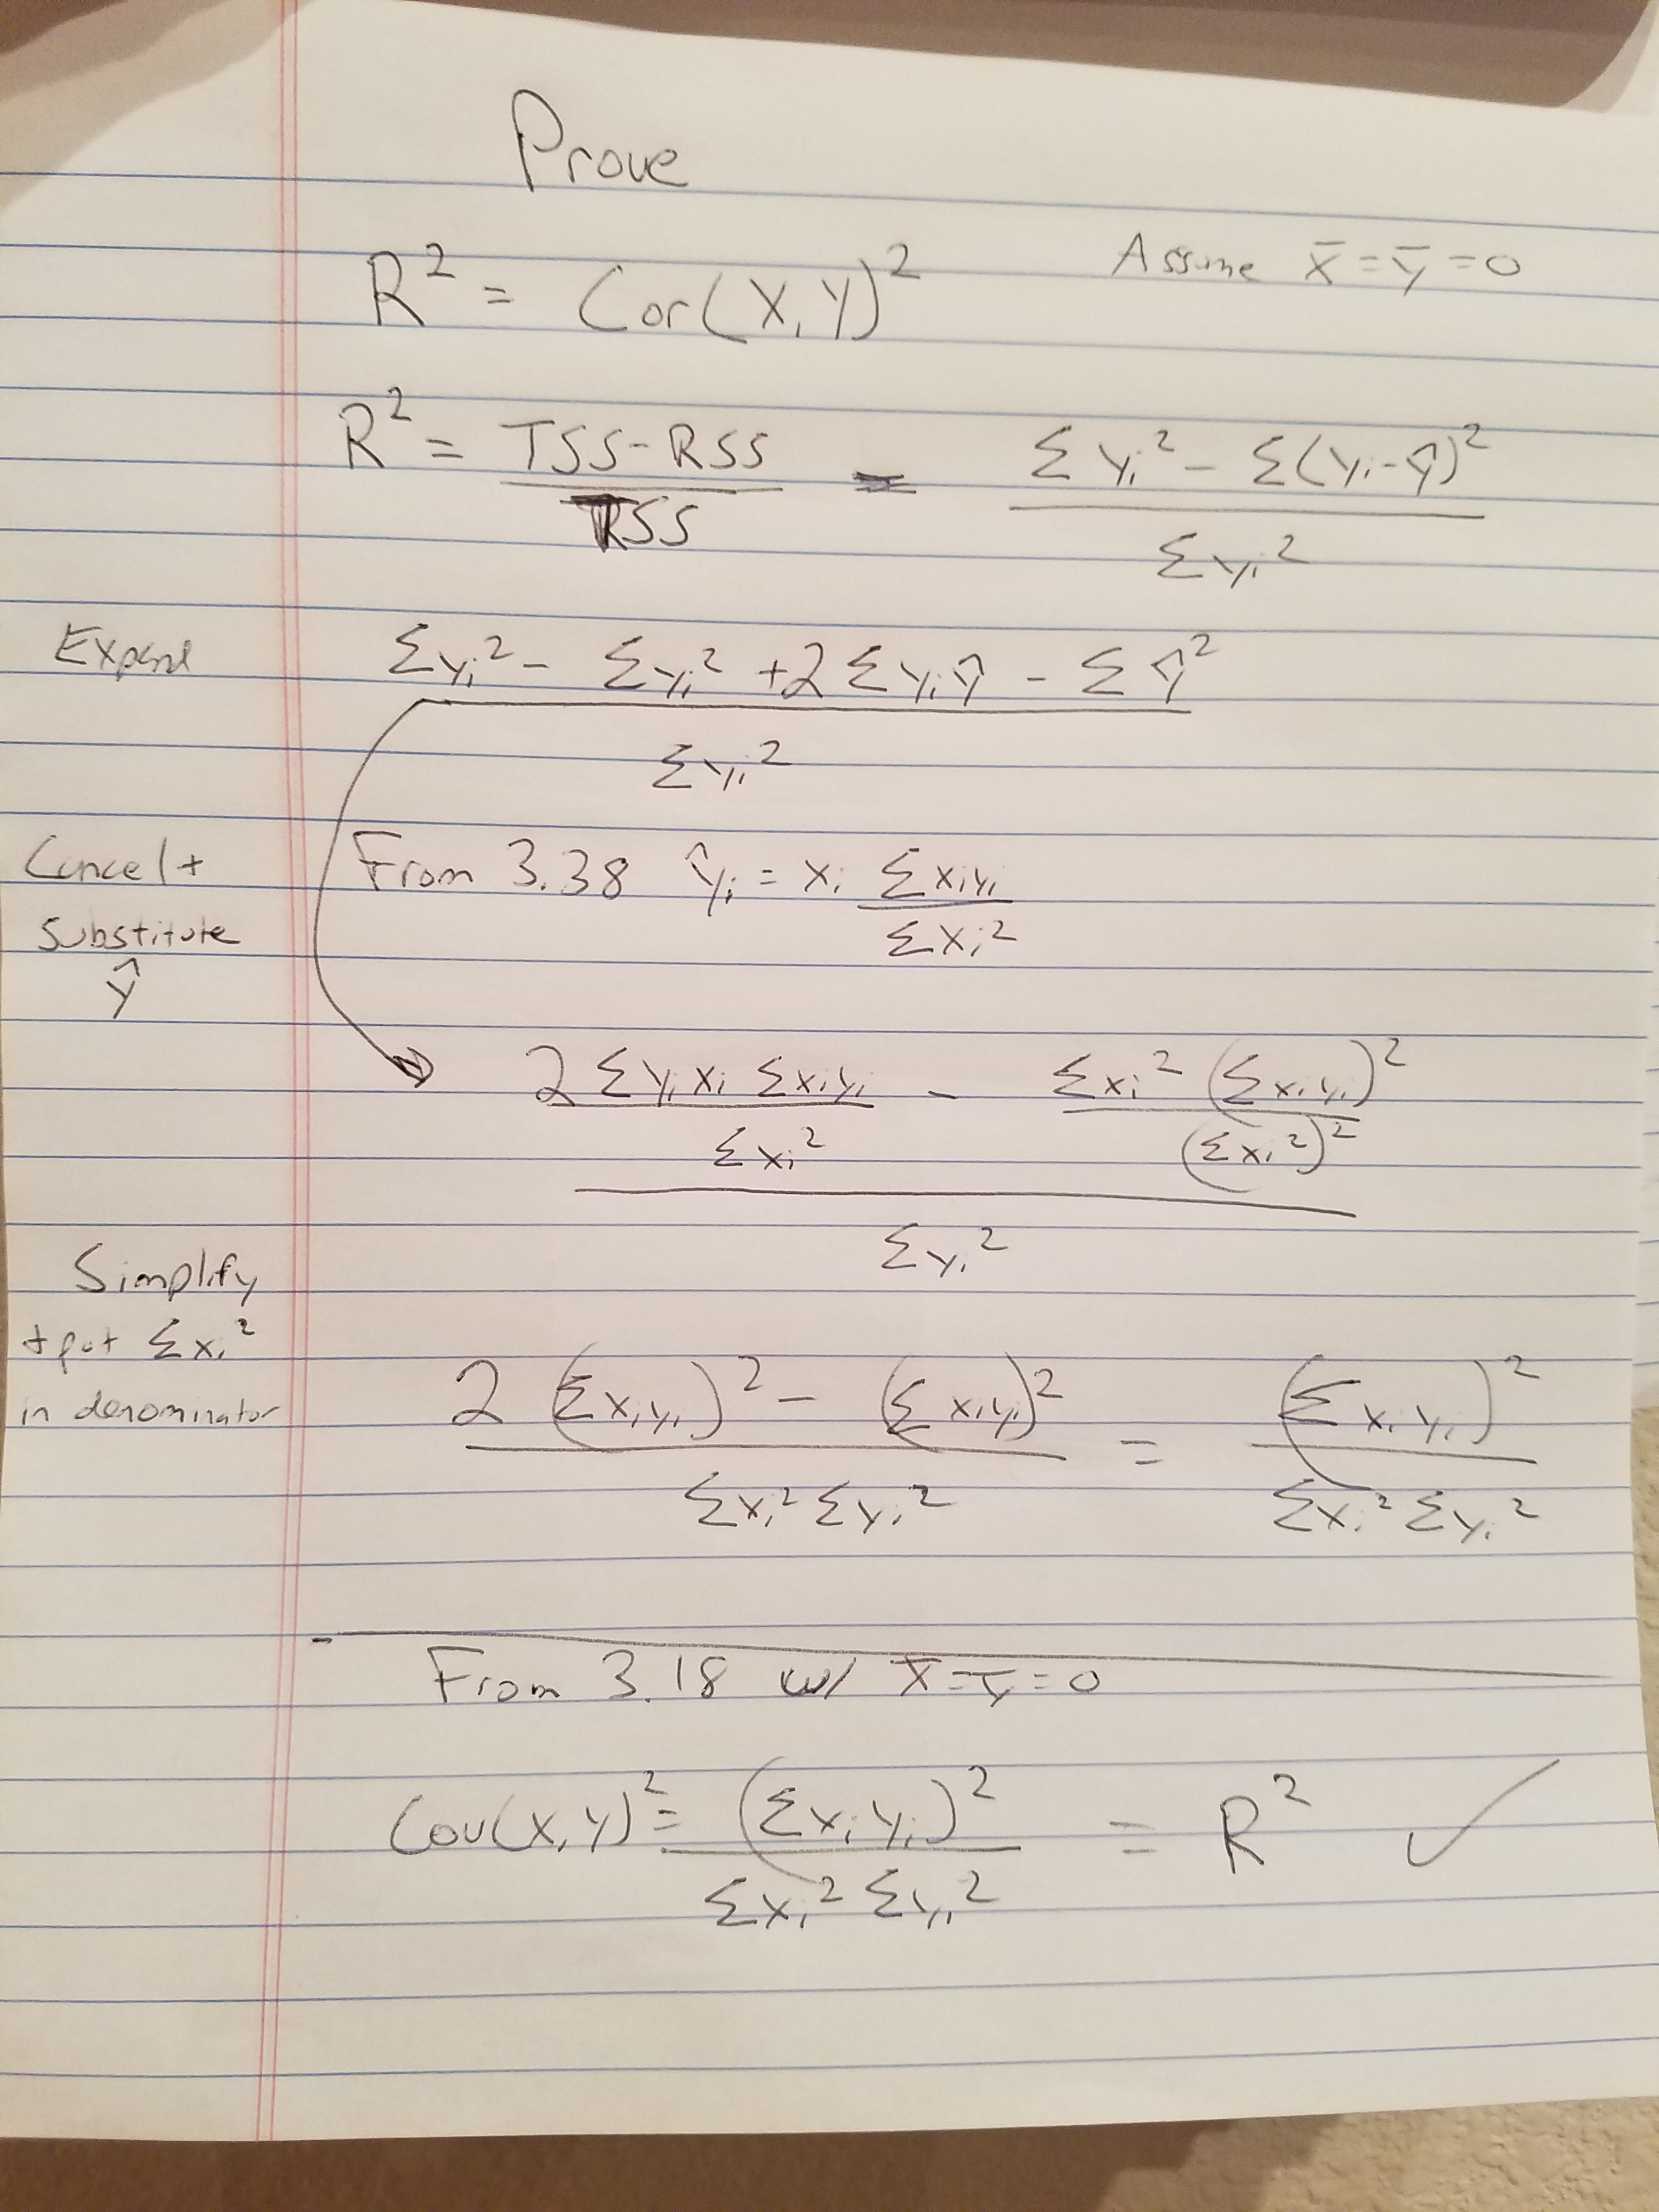

In [64]:
Image('images/Chapter 3 - 7 proof.jpg')

# 8

In [65]:
auto = pd.read_csv('data/auto.csv')
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [66]:
results = smf.ols('mpg ~ horsepower', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           7.03e-81
Time:                        12:51:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i) Yes there is strong evidence of a relationship between mpg and horsepower  
ii) Just from the summary it is very strong as the t-statistic is -24 though there is still lots of variation left in the model with an r-squared of .6  
iii) negative  
iv) 

In [67]:
results.conf_int()

0          1
Intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172

In [68]:
results.params['Intercept'] + results.params['horsepower'] * 98

24.467077152512438

In [69]:
results.conf_int()

0          1
Intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172

In [70]:
results.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

In [71]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

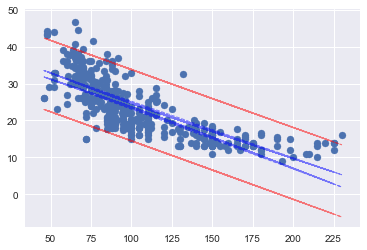

In [72]:
st, data, ss2 = summary_table(results, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# wls cinv
prstd, iv_l, iv_u = wls_prediction_std(results)

# plot OLS
cil, = plt.plot(auto['horsepower'], predict_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(auto['horsepower'], predict_ci_upp, 'r--', lw=1, alpha=0.5)
mcil, = plt.plot(auto['horsepower'], predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
mciu, = plt.plot(auto['horsepower'], predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)


plt.scatter(auto['horsepower'], auto['mpg']);

In [73]:
# create function to compute confidence or prediction interval given an x value
def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [74]:
create_interval(results, 'confidence', .05, auto['horsepower'], 98)

(23.973078960703951, 24.961075344320925)

In [75]:
create_interval(results, 'prediction', .05, auto['horsepower'], 98)

(14.809396070967129, 34.124758234057751)

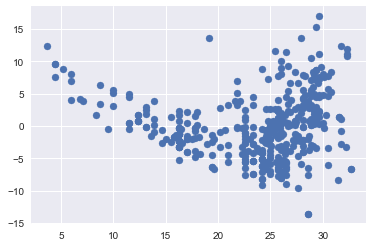

In [76]:
# Severe problems with the data
plt.scatter(results.fittedvalues, results.resid);

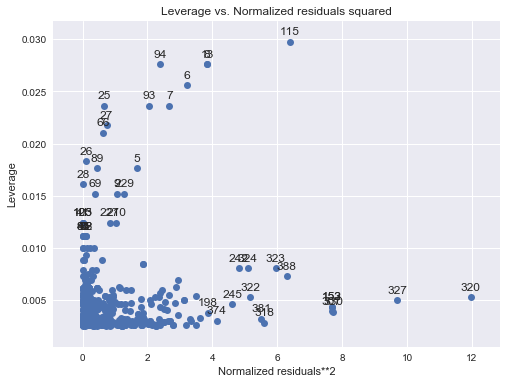

In [77]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 9

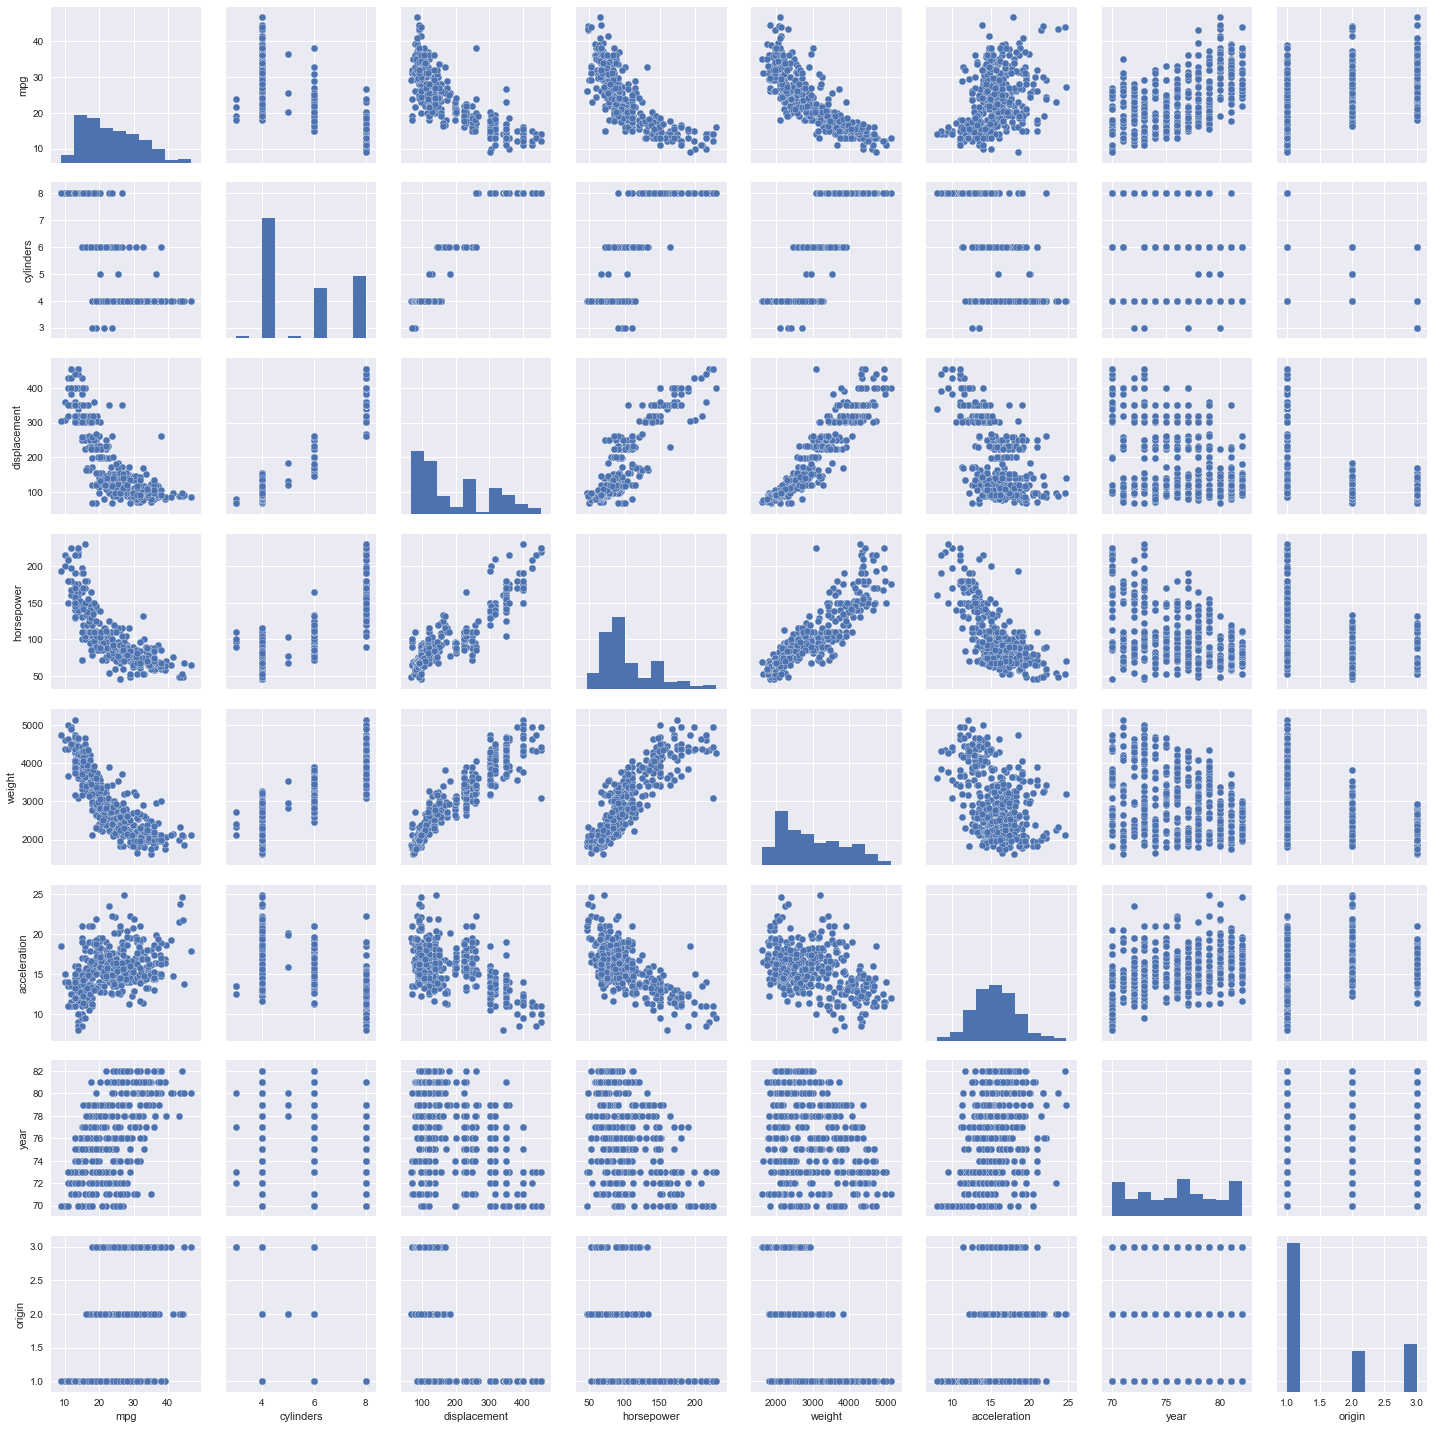

In [78]:
sns.pairplot(auto)

In [79]:
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

In [80]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [81]:
results = smf.ols(formula, data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          2.04e-139
Time:                        12:52:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) There is a clear relationship between predictor and response. F-stat is very high.  
ii) displacement, weight, year, origin are statistically significant    
iii) Its positive, so the higher the year the more the mpg    

### d) look at diagnostic plots

In [82]:
results_influence = OLSInfluence(results)

/Users/Ted/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


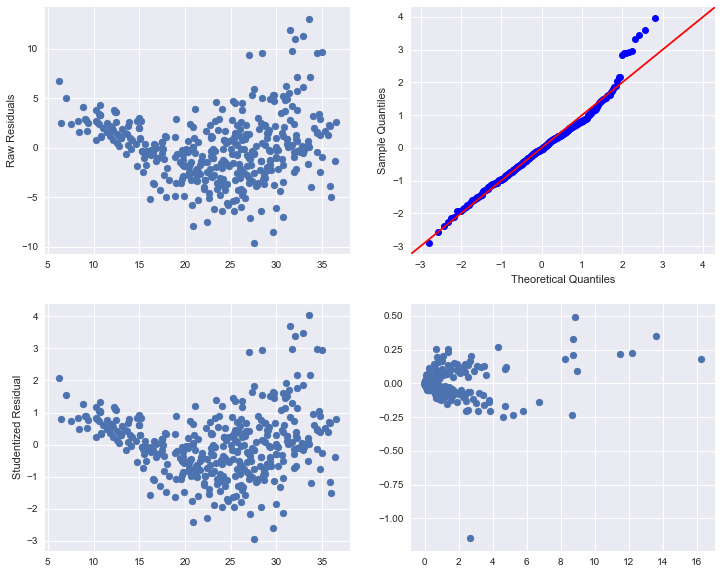

In [85]:
import statsmodels.api as sm

# looks very similar to previous problem
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0, 0].scatter(results.fittedvalues, results.resid)
ax[0, 0].set_ylabel("Raw Residuals")
ax[1, 0].scatter(results.fittedvalues, results_influence.resid_studentized_external)
ax[1, 0].set_ylabel("Studentized Residual")
sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])
ax[1, 1].scatter(results_influence.resid_studentized_external ** 2, results_influence.influence);

Most residuals fall within 3 standard deviations and the qqplot looks relatively good until the right tail where a few observations are above 3 standard deviations indicating outliers.

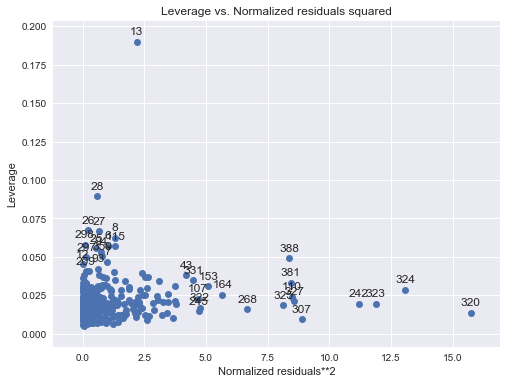

In [86]:
# point 13 has unusually large leverage
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

### e) Add interaction effects

In [87]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])

In [88]:
from itertools import combinations

In [89]:
interactions_formula =  " + ".join([comb[0] + " * " + comb[1] for comb in combinations(auto.columns[1:-1], 2)])
interactions_formula

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [90]:
formula = 'mpg ~ ' + " + ".join(auto.columns[1:-1])
formula += ' + ' + interactions_formula

In [91]:
results = smf.ols(formula, data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          4.01e-155
Time:                        12:53:38   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

After adding all possible (7c2 = 21) interaction combination effects to the model only one of them is significant at the .01 level. Acceleration * origin

In [92]:
# add displacement squared to model

In [93]:
formula += ' + np.power(displacement, 2)'
results = smf.ols(formula, data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          3.99e-154
Time:                        12:53:42   Log-Likelihood:                -929.68
No. Observations:                 392   AIC:                             1919.
Df Residuals:                     362   BIC:                             2039.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.4972     53.333      0.647      0.518     -70.385     139.379
cylinders                     7.4456      8.437      0.882      0.378      -9.147      24.038
displacement                 -0.4852      0.191     -2.537      0.012      -0.861      -0.109
horsepower                    0.4980      0.348      1.431      0.153      -0.186       1.182
weight                        0.0044      0.018      0.247      0.805      -0.030       0.039
acceleration                 -5.8498      2.177     -2.687      0.008     -10.130      -1.569
year                          0.6998      0.611      1.146      0.252      -0.501       1.900
origin                      -20.6750      7.155     -2.890      0.004     -34.746      -6.604
cylinders:displacement       -0.0054      0.010     -0.542      0.588      -0.025       0.014
cylinders:horsepower          0.0130      0.025      0.523      0.601      -0.036       0.062
cylinders:weight              0.0005      0.001      0.476      0.634      -0.002       0.002
cylinders:acceleration        0.2675      0.171      1.562      0.119      -0.069       0.604
cylinders:year               -0.1784      0.099     -1.809      0.071      -0.372       0.016
cylinders:origin              0.3362      0.553      0.608      0.543      -0.751       1.423
displacement:horsepower      -0.0001      0.000     -0.393      0.695      -0.001       0.001
displacement:weight        2.115e-05      2e-05      1.059      0.290   -1.81e-05    6.04e-05
displacement:acceleration    -0.0032      0.003     -0.925      0.355      -0.010       0.004
displacement:year             0.0060      0.002      2.489      0.013       0.001       0.011
displacement:origin           0.0262      0.021      1.237      0.217      -0.015       0.068
horsepower:weight         -1.672e-05   3.13e-05     -0.534      0.594   -7.84e-05    4.49e-05
horsepower:acceleration      -0.0074      0.004     -1.946      0.052      -0.015    8.04e-05
horsepower:year              -0.0058      0.004     -1.467      0.143      -0.014       0.002
horsepower:origin             0.0018      0.029      0.063      0.950      -0.056       0.060
weight:acceleration           0.0002      0.000      0.995      0.320      -0.000       0.001
weight:year                  -0.0002      0.000     -1.067      0.287      -0.001       0.000
weight:origin                -0.0007      0.002     -0.421      0.674      -0.004       0.003
acceleration:year             0.0560      0.026      2.183      0.030       0.006       0.106
acceleration:origin           0.4617      0.157      2.934      0.004       0.152       0.771
year:origin                   0.1399      0.074      1.887      0.060      -0.006       0.286
np.power(displacement, 2)  4.751e-05      0.000      0.264      0.792      

In [94]:
# lots of multicolinearity going on here
results = smf.ols('mpg ~ displacement + origin + np.power(displacement, 2)', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     286.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.60e-98
Time:                        12:53:46   Log-Likelihood:                -1132.4
No. Observations:                 392   AIC:                             2273.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    41.6665      1.757     23.717      0.000      38.212      45.121
displacement                 -0.1361      0.013    -10.466      0.000      -0.162      -0.111
origin                        0.1034      0.381      0.271      0.786      -0.646       0.853
np.power(displacement, 2)     0.0002    2.6e-05      6.383      0.000       0.000       0.000
==============================================================================
Omnibus:                       42.993   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.317
Skew:                           0.551   Prob(JB):                     2.23e-23
Kurtosis:                       5.274   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# sqrt of horsepower has higher r-squared than horsepower by itself
results = smf.ols('mpg ~ np.sqrt(horsepower)', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.02e-89
Time:                        12:53:47   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

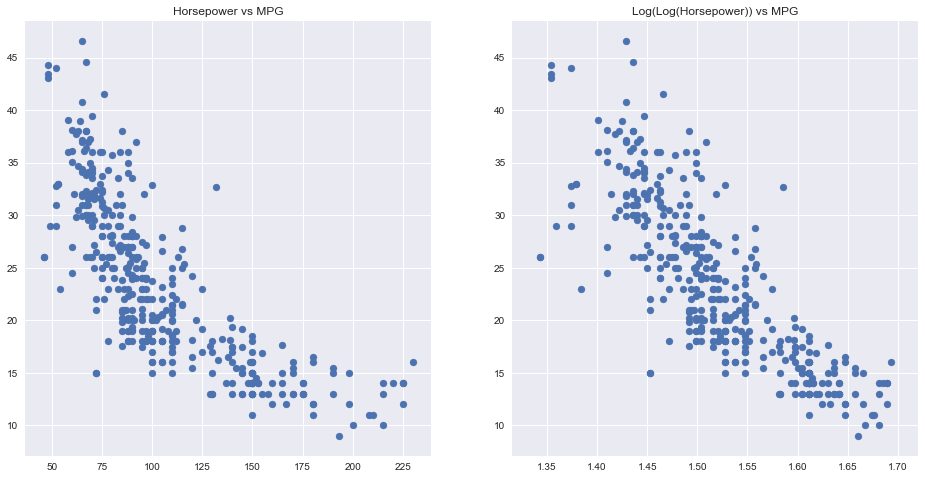

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(auto['horsepower'], auto['mpg'])
ax1.set_title("Horsepower vs MPG")
ax2.scatter(np.log(np.log(auto['horsepower'])), auto['mpg'])
ax2.set_title("Log(Log(Horsepower)) vs MPG");

In [97]:
# R-squared increases a bit more with log-log-horsepower
results = smf.ols('mpg ~ np.log(np.log((horsepower)))', data=auto).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     805.5
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           6.67e-97
Time:                        12:53:51   Log-Likelihood:                -1141.6
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     390   BIC:                             2295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      154.6842      4.629     33.413      0.000     145.582     163.786
np.log(np.log((horsepower)))   -86.3031      3.041    -28.382      0.000     -92.281     -80.325
==============================================================================
Omnibus:                       13.057   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.364
Skew:                           0.233   Prob(JB):                     3.78e-05
Kurtosis:                       4.014   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 10 - Carseats data

In [99]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [100]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.39e-23
Time:                        12:54:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only US and Price are statistically significant in our model. There is no difference whether someone is living in an urban area or not. Living in the US adds 1.2 to Sales up from 13 for outside of US. For every 1 unit increase in Price a corresponding .05 decrease in sales is seen.

# equations
Ignoring Urban because its not significant.
* In US: $Sales = 14.24 - .055 * Price$
* Not in US: $Sales = 13.04 - .055 * Price$

d) Reject null for US and Price

In [101]:
# e) smaller model without urban
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.66e-24
Time:                        12:54:06   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f) Since urban is nearly completely random, there is almost no difference in the two models above. R-squared is low so lots of variance remains in the model  
g) See table

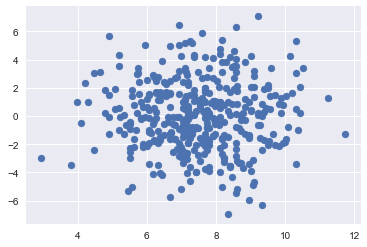

In [102]:
# Doesn't appear to be outliers
plt.scatter(results.fittedvalues, results.resid);

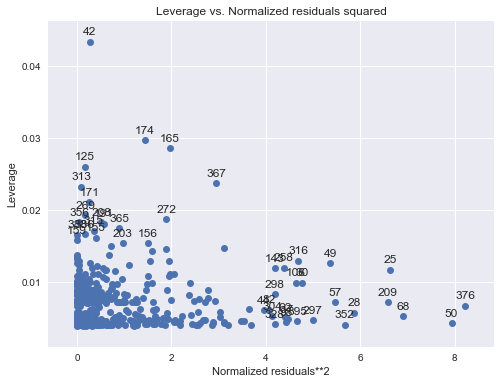

In [103]:
# a few high leverage points above .025
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 11

In [104]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

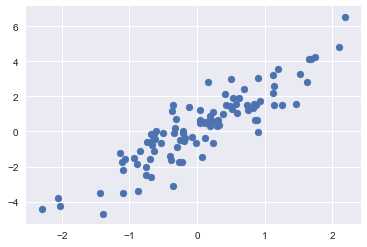

In [105]:
plt.scatter(x, y);

In [106]:
# No constant. Highly signifcant predictor
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        12:54:14   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# x onto y. Same as above
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        12:54:14   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e) The derived equation is symmetric to x and y, meaning you can replace x and y and the equation would be the exact same.

In [108]:
results = sm.OLS(x, sm.add_constant(y)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        12:54:14   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# F-statistic and t-stat is same with an intercept
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        12:54:15   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 12
a) Using equation 3.38, the coefficients will be the same when $\sum{y^2} = \sum{x^2}$  
b) Its very difficult to get the exact same coefficients. Any random pairing will do

In [110]:
# b
np.random.seed(1)
x = np.random.randn(100)
y = x + np.random.randn(100) / 100

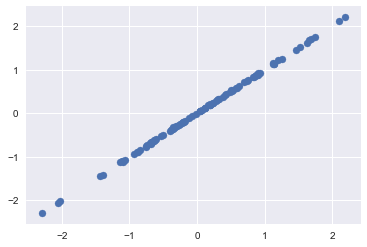

In [111]:
# very close to a perfect line
plt.scatter(x, y)

In [112]:
np.corrcoef(x, y)

array([[ 1.        ,  0.99994513],
       [ 0.99994513,  1.        ]])

In [113]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.845e+05
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          2.11e-197
Time:                        12:54:22   Log-Likelihood:                 324.85
No. Observations:                 100   AIC:                            -647.7
Df Residuals:                      99   BIC:                            -645.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0011      0.001    940.454      0.000       0.999       1.003
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# coefficients are just a little different
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.845e+05
Date:                Mon, 10 Jul 2017   Prob (F-statistic):          2.11e-197
Time:                        12:54:23   Log-Likelihood:                 324.96
No. Observations:                 100   AIC:                            -647.9
Df Residuals:                      99   BIC:                            -645.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9988      0.001    940.454      0.000       0.997       1.001
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.547
Skew:                           0.173   Prob(JB):                        0.761
Kurtosis:                       3.110   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# c) if x and y are the exact same (but in a different order) the coefficients for the model should be the same
x = np.random.randn(100) * 5
y = x.copy()
np.random.shuffle(y)

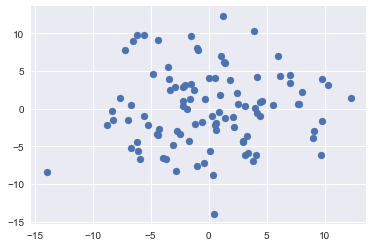

In [116]:
# perf
plt.scatter(x, y);

In [117]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2926
Date:                Mon, 10 Jul 2017   Prob (F-statistic):              0.590
Time:                        12:54:26   Log-Likelihood:                -303.19
No. Observations:                 100   AIC:                             608.4
Df Residuals:                      99   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0543      0.100      0.541      0.590      -0.145       0.253
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.678
Skew:                           0.141   Prob(JB):                        0.713
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Same coefficient!
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2926
Date:                Mon, 10 Jul 2017   Prob (F-statistic):              0.590
Time:                        12:54:26   Log-Likelihood:                -303.19
No. Observations:                 100   AIC:                             608.4
Df Residuals:                      99   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0543      0.100      0.541      0.590      -0.145       0.253
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.587
Skew:                           0.163   Prob(JB):                        0.746
Kurtosis:                       2.814   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 13

In [119]:
x = np.random.randn(100)
eps = np.random.randn(100) * .25
y = -1 + .5 * x + eps # b0 = -1 and b1 = .5

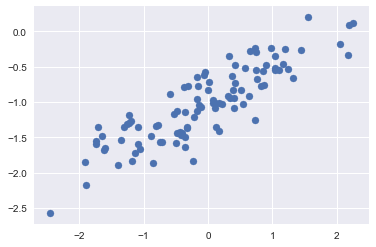

In [120]:
plt.scatter(x, y);

In [121]:
# coefficient estimates are very close to actual
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     298.0
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.78e-31
Time:                        12:54:29   Log-Likelihood:                -8.0036
No. Observations:                 100   AIC:                             20.01
Df Residuals:                      98   BIC:                             25.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9968      0.027    -37.548      0.000      -1.049      -0.944
x1             0.4617      0.027     17.262      0.000       0.409       0.515
==============================================================================
Omnibus:                        0.959   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                1.012
Skew:                          -0.132   Prob(JB):                        0.603
Kurtosis:                       2.584   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

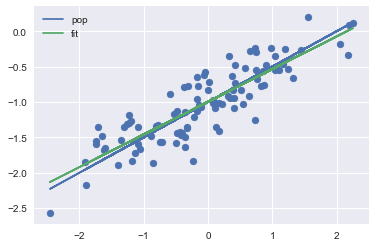

In [122]:
# they are very close to one another
plt.scatter(x, y)
plt.plot(x, -1 + .5 * x, label ='pop')
plt.plot(x, results.params[0] + results.params[1] * x, label = 'fit')
plt.legend();

In [123]:
results.params

array([-0.99680008,  0.46169562])

In [124]:
# x squared is not significant
x2 = np.column_stack((np.ones(100), x, x ** 2))
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.83e-30
Time:                        12:54:35   Log-Likelihood:                -7.9929
No. Observations:                 100   AIC:                             21.99
Df Residuals:                      97   BIC:                             29.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9997      0.034    -29.750      0.000      -1.066      -0.933
x1             0.4620      0.027     17.142      0.000       0.408       0.515
x2             0.0030      0.021      0.144      0.886      -0.038       0.044
==============================================================================
Omnibus:                        0.946   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                1.001
Skew:                          -0.130   Prob(JB):                        0.606
Kurtosis:                       2.584   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# the confidence intervals will shrink/expand with eps

# 14

In [126]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)
# regresion coeffs are 2, 2, .3

In [127]:
# very highly correlated. Only differ by random factor between 0 and .1
np.corrcoef(x1, x2)

array([[ 1.        ,  0.97747398],
       [ 0.97747398,  1.        ]])

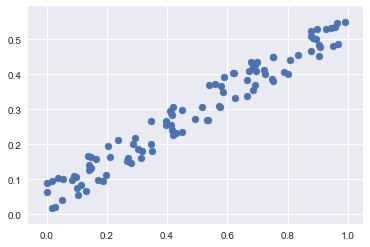

In [128]:
plt.scatter(x1, x2);

In [129]:
# Surprisingly both variables are not significant
X = np.column_stack((np.ones(100), x1, x2))
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.13
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           8.95e-07
Time:                        12:54:40   Log-Likelihood:                -144.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2250      0.259      8.583      0.000       1.710       2.739
x1             2.4383      1.675      1.456      0.149      -0.886       5.763
x2            -0.8693      3.292     -0.264      0.792      -7.404       5.665
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.393
Skew:                           0.118   Prob(JB):                        0.822
Kurtosis:                       2.804   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
X = np.column_stack((np.ones(100), x1))
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     32.50
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.26e-07
Time:                        12:54:42   Log-Likelihood:                -144.41
No. Observations:                 100   AIC:                             292.8
Df Residuals:                      98   BIC:                             298.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1817      0.200     10.914      0.000       1.785       2.578
x1             2.0060      0.352      5.701      0.000       1.308       2.704
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.399
Skew:                           0.116   Prob(JB):                        0.819
Kurtosis:                       2.795   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X = np.column_stack((np.ones(100), x2))
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     29.81
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           3.61e-07
Time:                        12:54:43   Log-Likelihood:                -145.45
No. Observations:                 100   AIC:                             294.9
Df Residuals:                      98   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0446      0.229      8.929      0.000       1.590       2.499
x1             3.8152      0.699      5.459      0.000       2.428       5.202
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.388
Skew:                           0.092   Prob(JB):                        0.824
Kurtosis:                       2.757   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since x1 and x2 are very highly correlated to one another it makes sense that when substituted in a linear model for one another a very similar r-squared would be achieved. The high collinearity is causing havoc with the model when both x1 and x2 are in the model. We know beforehand that each variable has a positive relationship with y and in the first model, x1 is positive and x2 is negative which is an impossibility. The standard errors for each predictor grow because of the collinearity which causes them not to be significant when they are.

In [132]:
x1_new = np.append(x1, .1)
x2_new = np.append(x2, .8)
y_new = np.append(y, 6)

In [133]:
X = np.column_stack((y_new, x1_new, x2_new))
df_new = pd.DataFrame(X, columns=['y', 'x1', 'x2'])
results = smf.ols('y ~ x2', data=df_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     36.58
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           2.62e-08
Time:                        12:54:51   Log-Likelihood:                -146.75
No. Observations:                 101   AIC:                             297.5
Df Residuals:                      99   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9996      0.222      9.014      0.000       1.559       2.440
x2             3.9972      0.661      6.048      0.000       2.686       5.309
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.382
Skew:                           0.075   Prob(JB):                        0.826
Kurtosis:                       2.739   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# correlation goes way down with one point
np.corrcoef(x1_new, x2_new)

array([[ 1.        ,  0.87688161],
       [ 0.87688161,  1.        ]])

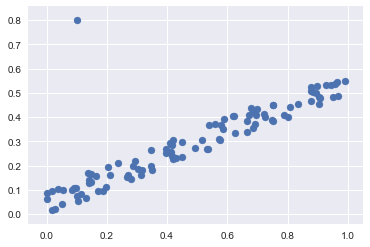

In [135]:
# huge outlier here
plt.scatter(x1_new, x2_new)

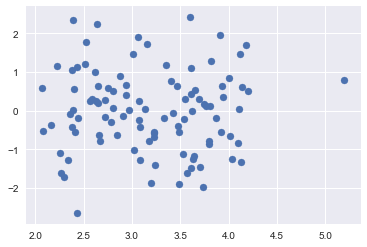

In [136]:
# Not an outlier in terms of residual, but very likely very influential
plt.scatter(results.fittedvalues, results.resid);

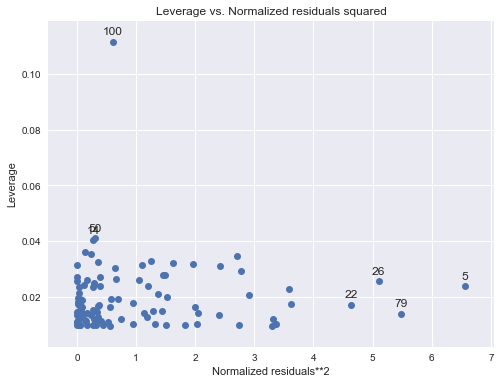

In [137]:
# Yup its unbelievably influential
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# 15

In [140]:
# a) simple linear regression for each predictor
boston = pd.read_csv('data/boston.csv')
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [141]:
# The below prints the confindence interval for each predictor in a simple linear regression
# Nearly all the predictors have 95% confindence bands that don't include 0 meaning they rejecy the null hypothesis
# the only predictors that fails to reject null: chas 
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    print(results.conf_int())

                  0         1
Intercept  3.633993  5.273394
zn        -0.105556 -0.042314
                  0         1
Intercept -3.374634 -0.752851
indus      0.409530  0.610023
                  0         1
Intercept  2.966214  4.522679
chas      -4.851815  1.066261
                   0          1
Intercept -17.058819 -10.380946
nox        25.356076  37.140987
                   0          1
Intercept  13.871682  27.091926
rm         -3.729343  -1.638760
                  0         1
Intercept -5.632536 -1.923277
age        0.082763  0.132809
                  0          1
Intercept  8.064263  10.934260
dis       -1.881617  -1.220187
                  0         1
Intercept -3.158448 -1.415870
rad        0.550460  0.685362
                   0         1
Intercept -10.131175 -6.925563
tax         0.026113  0.033372
                   0          1
Intercept -23.830322 -11.463545
ptratio     0.819218   1.484748
                   0          1
Intercept  13.752084  19.354975
black      -

In [142]:
formula = 'crim ~ ' + ' + '.join(boston.columns[1:])
formula

'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv'

In [143]:
# All variables in model. Many are not significant now
results = smf.ols(formula, data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 10 Jul 2017   Prob (F-statistic):           1.57e-56
Time:                        12:55:22   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
# all significant predictors
results.tvalues[abs(results.tvalues) > 2]

Intercept    2.354313
zn           2.394312
dis         -3.502893
rad          6.680448
black       -2.051959
medv        -3.286517
dtype: float64

In [145]:
# Get all coefficients from multiple reression model
multiple_linear_params = results.params.iloc[1:]

simple_linear_params = pd.Series()
for col in boston.columns[1:]:
    results_slr = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    simple_linear_params = simple_linear_params.append(results_slr.params.loc[[col]])
    
both_models = pd.DataFrame({'simple': simple_linear_params, 'multiple':multiple_linear_params})
both_models

multiple     simple
zn        0.044855  -0.073935
indus    -0.063855   0.509776
chas     -0.749134  -1.892777
nox     -10.313535  31.248531
rm        0.430131  -2.684051
age       0.001452   0.107786
dis      -0.987176  -1.550902
rad       0.588209   0.617911
tax      -0.003780   0.029742
ptratio  -0.271081   1.151983
black    -0.007538  -0.036280
lstat     0.126211   0.548805
medv     -0.198887  -0.363160

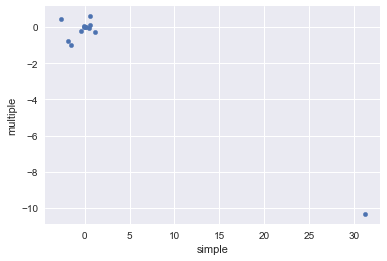

In [146]:
both_models.plot.scatter('simple', 'multiple')

In [147]:
# there are several variables raised to the power of 2 or 3 that are showing significance
# but these need to be combined with other variables to assess their actual importance
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data=boston).fit()
    print(results.conf_int())

                        0         1
Intercept        3.995365  5.696735
zn              -0.547929 -0.116448
np.power(zn, 2) -0.001103  0.014068
np.power(zn, 3) -0.000099  0.000024
                           0         1
Intercept           0.570162  6.754975
indus              -2.912179 -1.018247
np.power(indus, 2)  0.174681  0.329194
np.power(indus, 3) -0.008856 -0.005096
                              0             1
Intercept          2.965438e+00  4.523456e+00
chas              -4.191993e+14  6.437784e+14
np.power(chas, 2) -3.218892e+14  2.095997e+14
np.power(chas, 3) -3.218892e+14  2.095997e+14
                            0            1
Intercept          166.987961   299.185220
nox              -1614.151311  -944.591192
np.power(nox, 2)  1698.625715  2798.462391
np.power(nox, 3) -1538.996638  -952.409110
                          0           1
Intercept        -14.132472  239.381664
rm              -100.667850   22.367577
np.power(rm, 2)   -5.291984   14.393775
np.power(rm, 3)   -0